In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [3]:
# Replace 'CRO-USD' with the correct ticker symbol if different
cro = yf.Ticker("CRO-USD")

# Get historical market data with 15-minute intervals
# Note: 'period' can be set to '1d', '5d', '1mo', '3mo', etc.
# Interval '15m' fetches data in 15-minute intervals
hist = cro.history(period="60d", interval="15m")

# Display the first few rows of the dataframe
print(hist.head())


                               Open      High       Low     Close  Volume  \
Datetime                                                                    
2023-10-29 00:00:00+00:00  0.059518  0.059529  0.059376  0.059376       0   
2023-10-29 00:15:00+00:00  0.059381  0.059389  0.059354  0.059371       0   
2023-10-29 00:30:00+00:00  0.059385  0.059523  0.059385  0.059523    1910   
2023-10-29 00:45:00+00:00  0.059524  0.059568  0.059496  0.059499   10321   
2023-10-29 01:00:00+00:00  0.059491  0.059491  0.059164  0.059172   78161   

                           Dividends  Stock Splits  
Datetime                                            
2023-10-29 00:00:00+00:00        0.0           0.0  
2023-10-29 00:15:00+00:00        0.0           0.0  
2023-10-29 00:30:00+00:00        0.0           0.0  
2023-10-29 00:45:00+00:00        0.0           0.0  
2023-10-29 01:00:00+00:00        0.0           0.0  


In [5]:
data= hist.drop(columns=['Dividends','Stock Splits'])

In [6]:
# Sample DataFrame 'df' (replace this with your actual data)
# Assuming 'df' has columns: 'Open', 'High', 'Low', 'Close', 'Volume'

# Calculate Simple Moving Average (SMA)
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, window):
    return data.ewm(span=window, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

# Calculate Moving Average Convergence Divergence (MACD)
def calculate_macd(data, span1=5, span2=13, signal=4):
    ema1 = calculate_ema(data, span1)
    ema2 = calculate_ema(data, span2)
    macd_line = ema1 - ema2
    signal_line = calculate_ema(macd_line, signal)
    histogram = macd_line - signal_line
    return macd_line, signal_line, histogram

# Apply these functions to your dataframe
data['SMA_5'] = calculate_sma(data['Close'], 5)
data['SMA_20'] = calculate_sma(data['Close'], 20)
data['SMA_50'] = calculate_sma(data['Close'], 50)
data['EMA_10'] = calculate_ema(data['Close'], 20)
data['EMA_30'] = calculate_ema(data['Close'], 30)
data['EMA_100'] = calculate_ema(data['Close'], 100)
data['RSI_14'] = calculate_rsi(data['Close'], 14)
data['RSI_28'] = calculate_rsi(data['Close'], 28)
data['RSI_64'] = calculate_rsi(data['Close'], 64)
data['MACD_line'], data['Signal_line'], data['MACD_hist'] = calculate_macd(data['Close'])


In [7]:
data

,Open,High,Low,Close,Volume,SMA_5,SMA_20,SMA_50,EMA_10,EMA_30,EMA_100,RSI_14,RSI_28,RSI_64,MACD_line,Signal_line,MACD_hist
Datetime,,,,,,,,,,,,,,,,,
2023-10-29 00:00:00+00:00,0.059518,0.059529,0.059376,0.059376,0,NaN,NaN,NaN,0.059376,0.059376,0.059376,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00
2023-10-29 00:15:00+00:00,0.059381,0.059389,0.059354,0.059371,0,NaN,NaN,NaN,0.059376,0.059376,0.059376,NaN,NaN,NaN,-0.000001,-4.322756e-07,-6.484134e-07
2023-10-29 00:30:00+00:00,0.059385,0.059523,0.059385,0.059523,1910,NaN,NaN,NaN,0.059390,0.059385,0.059379,NaN,NaN,NaN,0.000027,1.067645e-05,1.666309e-05
2023-10-29 00:45:00+00:00,0.059524,0.059568,0.059496,0.059499,10321,NaN,NaN,NaN,0.059400,0.059393,0.059381,NaN,NaN,NaN,0.000038,2.150898e-05,1.624879e-05
2023-10-29 01:00:00+00:00,0.059491,0.059491,0.059164,0.059172,78161,0.059388,NaN,NaN,0.059378,0.059379,0.059377,NaN,NaN,NaN,-0.000020,4.745652e-06,-2.514499e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27 13:45:00+00:00,0.098031,0.098357,0.098031,0.098343,110532,0.097954,0.098186,0.097373,0.097999,0.097847,0.097701,49.798721,66.115228,56.606417,0.000010,-2.298195e-05,3.300012e-05
2023-12-27 14:00:00+00:00,0.098341,0.098420,0.098204,0.098368,68873,0.098070,0.098210,0.097395,0.098034,0.097880,0.097714,46.332210,67.328657,55.927311,0.000060,1.003712e-05,4.952860e-05
2023-12-27 14:15:00+00:00,0.098377,0.098526,0.098366,0.098366,77844,0.098215,0.098226,0.097417,0.098066,0.097912,0.097727,45.291205,65.704336,55.597388,0.000085,3.990743e-05,4.480547e-05


In [10]:
preprocessed = data.dropna()

In [12]:
def create_target(df, intervals):
    # Shift the closing price back by the specified intervals
    df['Future_Close'] = df['Close'].shift(-intervals)
    
    # Create the target column: 1 if the future price is higher, 0 otherwise
    df['Target'] = (df['Future_Close'] > df['Close']).astype(int)
    
    # Drop the 'Future_Close' column as it's no longer needed
    df.drop('Future_Close', axis=1, inplace=True)
    
    # Optional: Drop the last 'intervals' rows as they will have NaN values in 'Target'
    df.dropna(subset=['Target'], inplace=True)
    
    return df

# Set your desired number of intervals (e.g., 4 for 1 hour ahead)
intervals = 4

# Apply the function to your DataFrame
ML_READY_DATA = create_target(preprocessed, intervals)

# Display the first few rows of the DataFrame
ML_READY_DATA.head()


                               Open      High       Low     Close  Volume  \
Datetime                                                                    
2023-10-29 15:45:00+00:00  0.059299  0.059362  0.059299  0.059315   22270   
2023-10-29 16:00:00+00:00  0.059315  0.059379  0.059315  0.059379   16761   
2023-10-29 16:15:00+00:00  0.059383  0.059418  0.059343  0.059343   41340   
2023-10-29 16:30:00+00:00  0.059344  0.059352  0.059321  0.059352   33729   
2023-10-29 16:45:00+00:00  0.059352  0.059354  0.059297  0.059330   43897   

                              SMA_5    SMA_20    SMA_50    EMA_10    EMA_30  \
Datetime                                                                      
2023-10-29 15:45:00+00:00  0.059218  0.059059  0.059031  0.059093  0.059074   
2023-10-29 16:00:00+00:00  0.059281  0.059079  0.059039  0.059120  0.059093   
2023-10-29 16:15:00+00:00  0.059321  0.059094  0.059047  0.059141  0.059109   
2023-10-29 16:30:00+00:00  0.059337  0.059111  0.059054  0.059161

C:\Users\Jamel Youngsam\AppData\Local\Temp\ipykernel_32492\2597438232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Future_Close'] = df['Close'].shift(-intervals)
C:\Users\Jamel Youngsam\AppData\Local\Temp\ipykernel_32492\2597438232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = (df['Future_Close'] > df['Close']).astype(int)
C:\Users\Jamel Youngsam\AppData\Local\Temp\ipykernel_32492\2597438232.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [37]:
data = ML_READY_DATA.reset_index(drop=True)

In [11]:
from pycaret.classification import *

In [48]:
setup(data, target='Target',data_split_shuffle=False ,data_split_stratify=None , fix_imbalance=True)

,Description,Value
0,Session id,6999
1,Target,Target
2,Target type,Binary
3,Original data shape,"(5620, 18)"
4,Transformed data shape,"(5889, 18)"
5,Transformed train set shape,"(4202, 18)"
6,Transformed test set shape,"(1687, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [49]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5220,0.5171,0.5264,0.5557,0.5403,0.0431,0.0433,0.1390
svm,SVM - Linear Kernel,0.5187,0.0000,0.6714,0.4808,0.5366,0.0158,0.0206,0.0590
lda,Linear Discriminant Analysis,0.5006,0.5049,0.4919,0.5431,0.4730,0.0025,0.0117,0.0460
ridge,Ridge Classifier,0.5001,0.0000,0.4129,0.5615,0.4127,0.0124,0.0210,0.0580
qda,Quadratic Discriminant Analysis,0.4902,0.4849,0.5576,0.5153,0.5167,-0.0288,-0.0222,0.0580
lr,Logistic Regression,0.4732,0.4949,0.2180,0.5171,0.3032,-0.0155,-0.0190,0.1100
dummy,Dummy Classifier,0.4658,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0570
nb,Naive Bayes,0.4605,0.4952,0.2213,0.4604,0.2137,-0.0438,-0.0693,0.0560
ada,Ada Boost Classifier,0.4572,0.4396,0.4329,0.4869,0.4343,-0.0815,-0.0806,0.2200
dt,Decision Tree Classifier,0.4297,0.4325,0.3895,0.4375,0.3986,-0.1321,-0.1376,0.0760


In [51]:
tuned = tune_model(best,optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5279,0.5610,0.5498,0.5604,0.5550,0.0524,0.0524
1,0.5355,0.5347,0.4952,0.5746,0.5320,0.0760,0.0768
2,0.5457,0.5293,0.5905,0.5714,0.5808,0.0852,0.0853
3,0.4758,0.4970,0.4381,0.5111,0.4718,-0.0423,-0.0428
4,0.5038,0.5108,0.4905,0.5393,0.5137,0.0095,0.0096
5,0.4784,0.4693,0.5143,0.5118,0.5131,-0.0486,-0.0486
6,0.4860,0.4827,0.5143,0.5192,0.5167,-0.0321,-0.0321
7,0.5038,0.4891,0.4905,0.5393,0.5137,0.0095,0.0096
8,0.4987,0.4944,0.5000,0.5330,0.5160,-0.0027,-0.0027


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [50]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [44]:
calibrated = calibrate_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4848,0.4737,0.7014,0.5139,0.5932,-0.0654,-0.0715
1,0.5178,0.4486,0.8429,0.5299,0.6507,-0.0109,-0.0144
2,0.4391,0.4127,0.3762,0.4675,0.4169,-0.1114,-0.1138
3,0.4962,0.5618,0.1190,0.6579,0.2016,0.0453,0.0810
4,0.5522,0.5646,0.7429,0.5612,0.6393,0.0781,0.0835
5,0.4427,0.4590,0.3667,0.4724,0.4129,-0.1016,-0.1046
6,0.5013,0.4634,0.4619,0.5389,0.4974,0.0083,0.0084
7,0.4402,0.4528,0.4238,0.4734,0.4472,-0.1163,-0.1170
8,0.6209,0.5911,0.6381,0.6473,0.6427,0.2389,0.2390


In [52]:
results = predict_model(calibrated, probability_threshold=0.95)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Close
- EMA_10
- EMA_100
- EMA_30
- High
- ...


In [46]:
results

,Open,High,Low,Close,Volume,SMA_5,SMA_20,SMA_50,EMA_10,EMA_30,EMA_100,RSI_14,RSI_28,RSI_64,MACD_line,Signal_line,MACD_hist,Target,prediction_label,prediction_score
3933,0.110481,0.110818,0.110085,0.110818,801656,0.109022,0.109632,0.108981,0.109515,0.109284,0.105653,53.644203,47.003162,61.176029,0.000159,-0.000215,0.000374,0,0,0.5065
3934,0.110894,0.111691,0.110894,0.111317,1461688,0.109693,0.109755,0.109093,0.109686,0.109415,0.105765,49.817139,44.004623,61.832214,0.000452,0.000052,0.000400,0,0,0.5019
3935,0.111316,0.111316,0.110389,0.110389,582944,0.110293,0.109827,0.109188,0.109753,0.109478,0.105857,45.482578,45.298210,61.028328,0.000422,0.000200,0.000222,0,0,0.5122
3936,0.110353,0.110353,0.110072,0.110072,398912,0.110607,0.109843,0.109264,0.109784,0.109516,0.105940,42.433044,45.244217,60.094925,0.000324,0.000249,0.000074,0,0,0.5136
3937,0.110079,0.110079,0.109600,0.110044,349544,0.110528,0.109889,0.109323,0.109808,0.109550,0.106022,45.339275,44.120583,60.326344,0.000247,0.000248,-0.000001,0,0,0.5152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,0.098031,0.098357,0.098031,0.098343,110532,0.097954,0.098186,0.097373,0.097999,0.097847,0.097701,49.798721,66.115227,56.606419,0.000010,-0.000023,0.000033,1,0,0.4942
5616,0.098341,0.098420,0.098204,0.098368,68873,0.098070,0.098210,0.097395,0.098034,0.097880,0.097714,46.332211,67.328659,55.927311,0.000060,0.000010,0.000050,0,0,0.4931
5617,0.098377,0.098526,0.098366,0.098366,77844,0.098215,0.098226,0.097417,0.098066,0.097912,0.097727,45.291206,65.704338,55.597389,0.000085,0.000040,0.000045,0,0,0.4939
5618,0.098236,0.098651,0.098236,0.098651,133755,0.098347,0.098262,0.097446,0.098121,0.097959,0.097745,49.476273,66.438141,57.125488,0.000149,0.000084,0.000066,0,0,0.4946


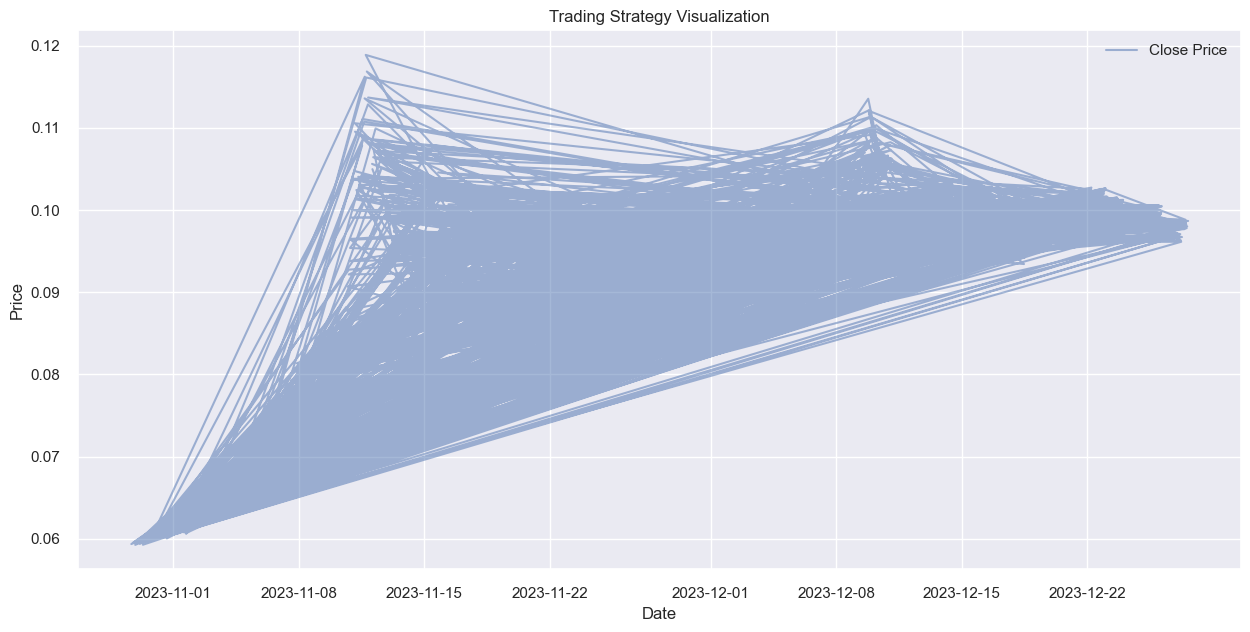

Final Capital: 10000


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set(style="darkgrid")

def backtest_strategy_with_visualization(df, initial_capital=10000, transaction_cost=0.001):
    capital = initial_capital
    position = 0  # No position initially
    trade_log = []  # Log trades for visualization
    is_position_open = False

    for i in range(1, len(df)):
        if df['prediction_label'][i-1] == 1 and not is_position_open:
            # Buy signal and no position currently open
            position = capital / df['Close'][i]  # Buy as much as possible
            capital -= position * df['Close'][i] * transaction_cost
            trade_log.append((i, df.index[i], 'buy', df['Close'][i]))
            is_position_open = True
            
        elif df['prediction_label'][i-1] == 0 and is_position_open:
            # Sell signal and position is open
            capital += position * df['Close'][i]
            capital -= position * df['Close'][i] * transaction_cost
            trade_log.append((i, df.index[i], 'sell', df['Close'][i]))
            is_position_open = False

    # Sell any remaining position at the end
    if is_position_open:
        capital += position * df['Close'].iloc[-1]
        capital -= position * df['Close'].iloc[-1] * transaction_cost
        trade_log.append((len(df), df.index[-1], 'sell', df['Close'].iloc[-1]))

    # Visualization
    plt.figure(figsize=(15, 7))
    plt.plot(df['Close'], label='Close Price', alpha=0.5)
    plt.title("Trading Strategy Visualization")
    plt.xlabel("Date")
    plt.ylabel("Price")

    # Highlight open periods and annotate trades
    for i, trade in enumerate(trade_log):
        date, price, action = trade[1], trade[3], trade[2]
        if action == 'buy':
            plt.scatter(date, price, color='green', label='Buy' if i == 0 else "")
            plt.annotate(f'Buy @{price:.2f}', xy=(date, price), xytext=(date, price*1.02),
                         arrowprops=dict(facecolor='green', shrink=0.05), ha='center')
        else:
            plt.scatter(date, price, color='red', label='Sell' if i == 0 else "")
            plt.annotate(f'Sell @{price:.2f}', xy=(date, price), xytext=(date, price*0.98),
                         arrowprops=dict(facecolor='red', shrink=0.05), ha='center')

    plt.legend()
    plt.show()

    return capital

# Example usage:
# Assuming 'df' is your DataFrame with 'Close' and 'Predictions' columns
final_capital = backtest_strategy_with_visualization(results)
print("Final Capital:", final_capital)
